# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

In [55]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names


1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [96]:
import scipy as s
import numpy as np
import pandas as pd
import seaborn as sns
import itertools as it
import matplotlib.pyplot as plt

In [16]:
labels = ['A'+str(i) for i in range(1,17)]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None, names=labels)

In [17]:
df.shape

(690, 16)

In [50]:
df = df.replace({'?': np.nan})

In [64]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [65]:
df = df.astype({'A2': 'float', 'A11': 'float', 'A14': 'float', 'A15': 'float'})

In [66]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [135]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [87]:
df.describe(exclude=np.number)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [109]:
plus = df[df['A16'] == '+']
minus  = df[df['A16'] == '-']

In [174]:
minus.describe()

,A2,A3,A8,A11,A14,A15
count,373.000000,383.000000,383.000000,383.000000,376.000000,383.000000
mean,29.808231,3.839948,1.257924,0.631854,199.699468,198.605744
std,10.919291,4.337662,2.120481,1.900049,181.564835,671.608839
min,15.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.835000,0.125000,0.000000,100.000000,0.000000
50%,27.330000,2.210000,0.415000,0.000000,167.500000,1.000000
75%,34.830000,5.000000,1.500000,0.000000,272.000000,67.000000
max,80.250000,26.335000,13.875000,20.000000,2000.000000,5552.000000


In [138]:
plus.describe()

,A2,A3,A8,A11,A14,A15
count,305.000000,307.000000,307.000000,307.000000,301.000000,307.000000
mean,33.720492,5.904951,3.427899,4.605863,164.421927,2038.859935
std,12.809641,5.471485,4.120792,6.320242,161.770675,7659.763941
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.170000,1.500000,0.750000,0.000000,0.000000,0.000000
50%,30.500000,4.460000,2.000000,3.000000,120.000000,221.000000
75%,41.330000,9.520000,5.000000,7.000000,280.000000,1209.000000
max,76.750000,28.000000,28.500000,67.000000,840.000000,100000.000000


In [258]:
df.select_dtypes(include=np.number)

,A2,A3,A8,A11,A14,A15
0,30.83,0.000,1.250,1.0,202.0,0.0
1,58.67,4.460,3.040,6.0,43.0,560.0
2,24.50,0.500,1.500,0.0,280.0,824.0
3,27.83,1.540,3.750,5.0,100.0,3.0
4,20.17,5.625,1.710,0.0,120.0,0.0
5,32.08,4.000,2.500,0.0,360.0,0.0
6,33.17,1.040,6.500,0.0,164.0,31285.0
7,22.92,11.585,0.040,0.0,80.0,1349.0
8,54.42,0.500,3.960,0.0,180.0,314.0
9,42.50,4.915,3.165,0.0,52.0,1442.0


In [118]:
pmeans = []
mmeans = []
ttests = []
pvalues = []

for label in df.select_dtypes(include=np.number).columns.values:
    pmeans.append(plus[label].mean())
    mmeans.append(minus[label].mean())
    ttest, pvalue = s.stats.ttest_ind(plus[label], minus[label], nan_policy='omit', equal_var=False)
    ttests.append(ttest)
    pvalues.append(pvalue)

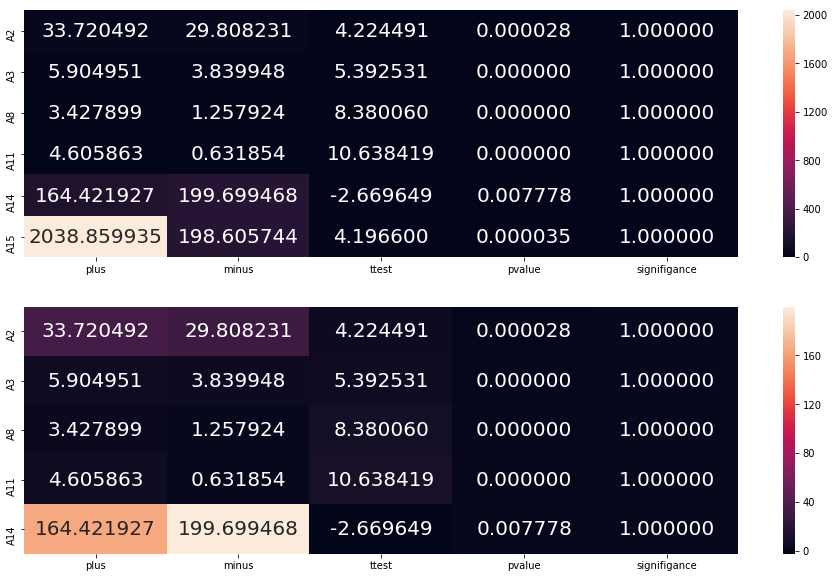

In [178]:
fig, (ax, bx) = plt.subplots(2, 1, figsize=(16,10))

statistics = pd.DataFrame({'plus': pmeans, 'minus': mmeans, 'ttest': ttests, 'pvalue': pvalues})
statistics['signifigance'] = 0.05 > statistics['pvalue']

sns.heatmap(
    data=statistics.astype({'signifigance': 'int'}),
    fmt='.6f', 
    annot_kws={"size": 20}, 
    annot=True,
    yticklabels=df.select_dtypes(include=np.number).columns.values,
    ax=ax
)

sns.heatmap(
    data=statistics[:5].astype({'signifigance': 'int'}),
    fmt='.6f', 
    annot_kws={"size": 20}, 
    annot=True,
    yticklabels=df.select_dtypes(include=np.number).columns.values[:5],
    ax=bx
)

In [179]:
# Column A15 is the extreme feature, as given by the means of the plus and minus samples for that feature
# Column A14 is the similar feature, it's pvalue is the largest and hence the least drastic

In [279]:
chis = pd.DataFrame()
pvs = pd.DataFrame()

for A,B in it.combinations(df.select_dtypes(exclude=np.number).columns.values, 2):
    chi, pvalue, _, _ = s.stats.chi2_contingency(pd.crosstab(df[A], df[B]).values)
    chis.loc[A,B] = chi
    pvs.loc[A,B] = pvalue

Text(0.5,1,'Degree Of Dependence Between Each Variable')

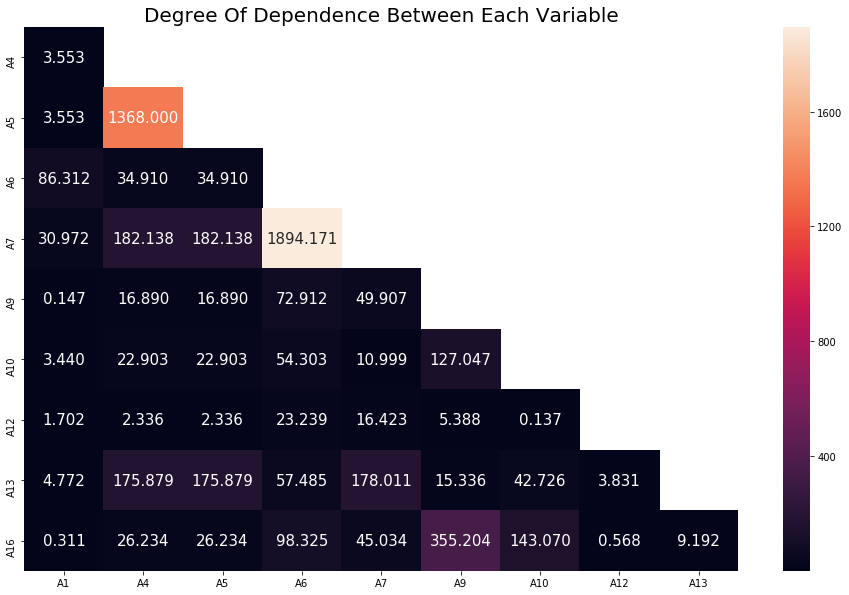

In [286]:
fig, ax = plt.subplots(1, 1, figsize=(16,10))

sns.heatmap(chis.T, annot=True, fmt='.3f', annot_kws={"size": 15},ax=ax)

plt.title("Degree Of Dependence Between Each Variable", fontsize=20)

Text(0.5,1,'Probability Of The Null Hypothesis - That Each Variable Is Independent')

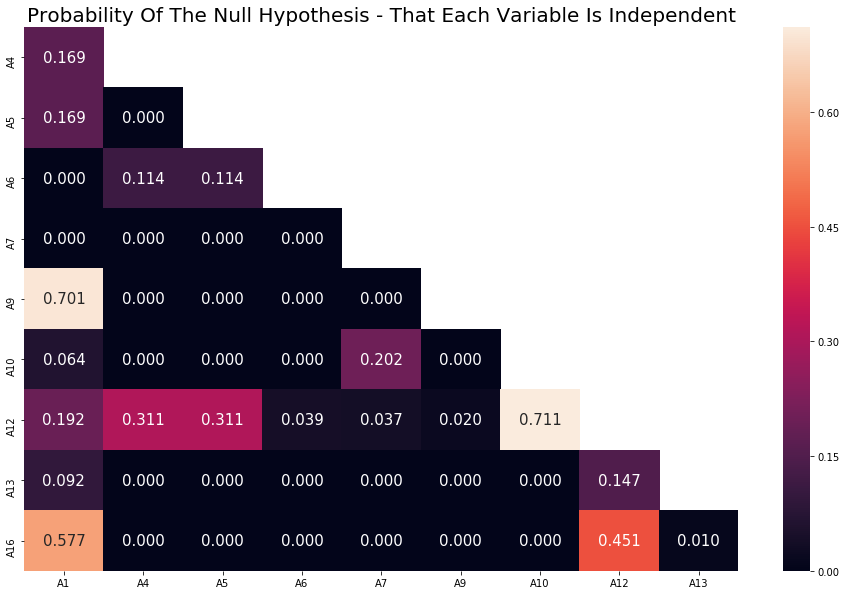

In [287]:
fig, ax = plt.subplots(1, 1, figsize=(16,10))

sns.heatmap(pvs.T, annot=True, fmt='.3f', annot_kws={"size": 15},ax=ax)

plt.title("Probability Of The Null Hypothesis - That Each Variable Is Independent", fontsize=20)

In [288]:
# There is strong rejection of the null between the variables A5 and A4
# There is confirmation of the null hypothesis for the variables A12 and A16

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

- The ttests indicate that by and large the samples plus and minus, drawn from the population at large, are very similar in many regards
  save for A15, in which there is extremely high error between the two cohorts. Thus indicating that, should we want to use a feature to 
  build a classifier A15 would be an excellent means of doing so. 
- The matrix displayed above shows that most variables have a rather mild dependence on each other, and as indicated by the matrix showing the
  pvalues for each such indepedence test, with few exceptions this dependence can be considered legitimate, and not the result of chance. It
  does however seem to point to the some interconnection between all the variables at hand, perhaps, for example, most of these features were
  engineered from some other pair of variables which themselves expressed dependence, hence it got watered down and spread out arround the 
  dataset.
- Getting the data to be just write to allow for me to run AND visualize the test at hand. The data wasn't nescessairily always in the most 
  conveinent shape, literally, so having to reorient and experiment with different heirarchical structures took up a lot of time.